In [1]:
from dea_tools.dask import create_local_dask_cluster

client = create_local_dask_cluster(return_client=True)

<Client: 'tcp://127.0.0.1:41001' processes=1 threads=15, memory=117.21 GiB>

In [11]:
from dea_tools.datahandling import load_ard
import datacube

dc = datacube.Datacube()

t, l = -9.182339, 142.516332
b, r = -9.513359, 142.991061

def landsat_filter(d):
    return "L1TP" in d.metadata.landsat_product_id 

query_params = dict(
    x=(l, r),
    y=(t, b),
    time=("2020", "2024"),
    cloud_cover=(0, 50),
    dataset_predicate=landsat_filter,
)

load_params = dict(
    measurements=["nbart_panchromatic"],
    resolution=(-15, 15),
    output_crs="EPSG:32654",
    resampling="nearest",
    dask_chunks={},
)

ds = load_ard(dc=dc,
    products=["ga_ls8c_ard_3", "ga_ls9c_ard_3"],
    **query_params,
    **load_params,
)

ds.load()
ds

Finding datasets
    ga_ls8c_ard_3
    ga_ls9c_ard_3
Applying fmask pixel quality/cloud mask
Returning 206 time steps as a dask array


<xarray.Dataset> Size: 7GB
Dimensions:             (time: 206, y: 2459, x: 3490)
Coordinates:
  * time                (time) datetime64[ns] 2kB 2020-01-16T00:39:18.555464 ...
  * y                   (y) float64 20kB -1.015e+06 -1.015e+06 ... -1.052e+06
  * x                   (x) float64 28kB 6.664e+05 6.665e+05 ... 7.188e+05
    spatial_ref         int32 4B 32654
Data variables:
    nbart_panchromatic  (time, y, x) float32 7GB nan nan nan ... 552.0 554.0
Attributes:
    crs:           epsg:32654
    grid_mapping:  spatial_ref

In [9]:
dss = dc.find_datasets(product=["ga_ls8c_ard_3", "ga_ls9c_ard_3"], **query_params)

In [10]:
dss[0].metadata_doc

{'id': 'e9834dd1-a7da-41c5-bf1b-d3a74a6b5476',
 'crs': 'epsg:32654',
 'grids': {'g15m': {'shape': [15581, 15301],
   'transform': [15.0, 0.0, 647092.5, 0.0, -15.0, -1003492.5, 0.0, 0.0, 1.0]},
  'default': {'shape': [7791, 7651],
   'transform': [30.0, 0.0, 647085.0, 0.0, -30.0, -1003485.0, 0.0, 0.0, 1.0]}},
 'label': 'ga_ls8c_ard_3-2-1_098067_2023-03-06_final',
 'extent': {'lat': {'end': -9.07637092195612, 'begin': -11.173537871010959},
  'lon': {'end': 144.4261983551907, 'begin': 142.3485456098316}},
 '$schema': 'https://schemas.opendatacube.org/dataset',
 'lineage': {'source_datasets': {}},
 'product': {'name': 'ga_ls8c_ard_3'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[690103.0, -1003762.0],
    [690105.0, -1003755.0],
    [813355.0, -1031047.0],
    [875156.0, -1044728.0],
    [876236.0, -1044968.0],
    [876249.0, -1044974.0],
    [876255.0, -1044975.0],
    [876255.0, -1044976.0],
    [876338.0, -1045013.0],
    [875407.0, -1049276.0],
    [851257.0, -1158056.0],
    

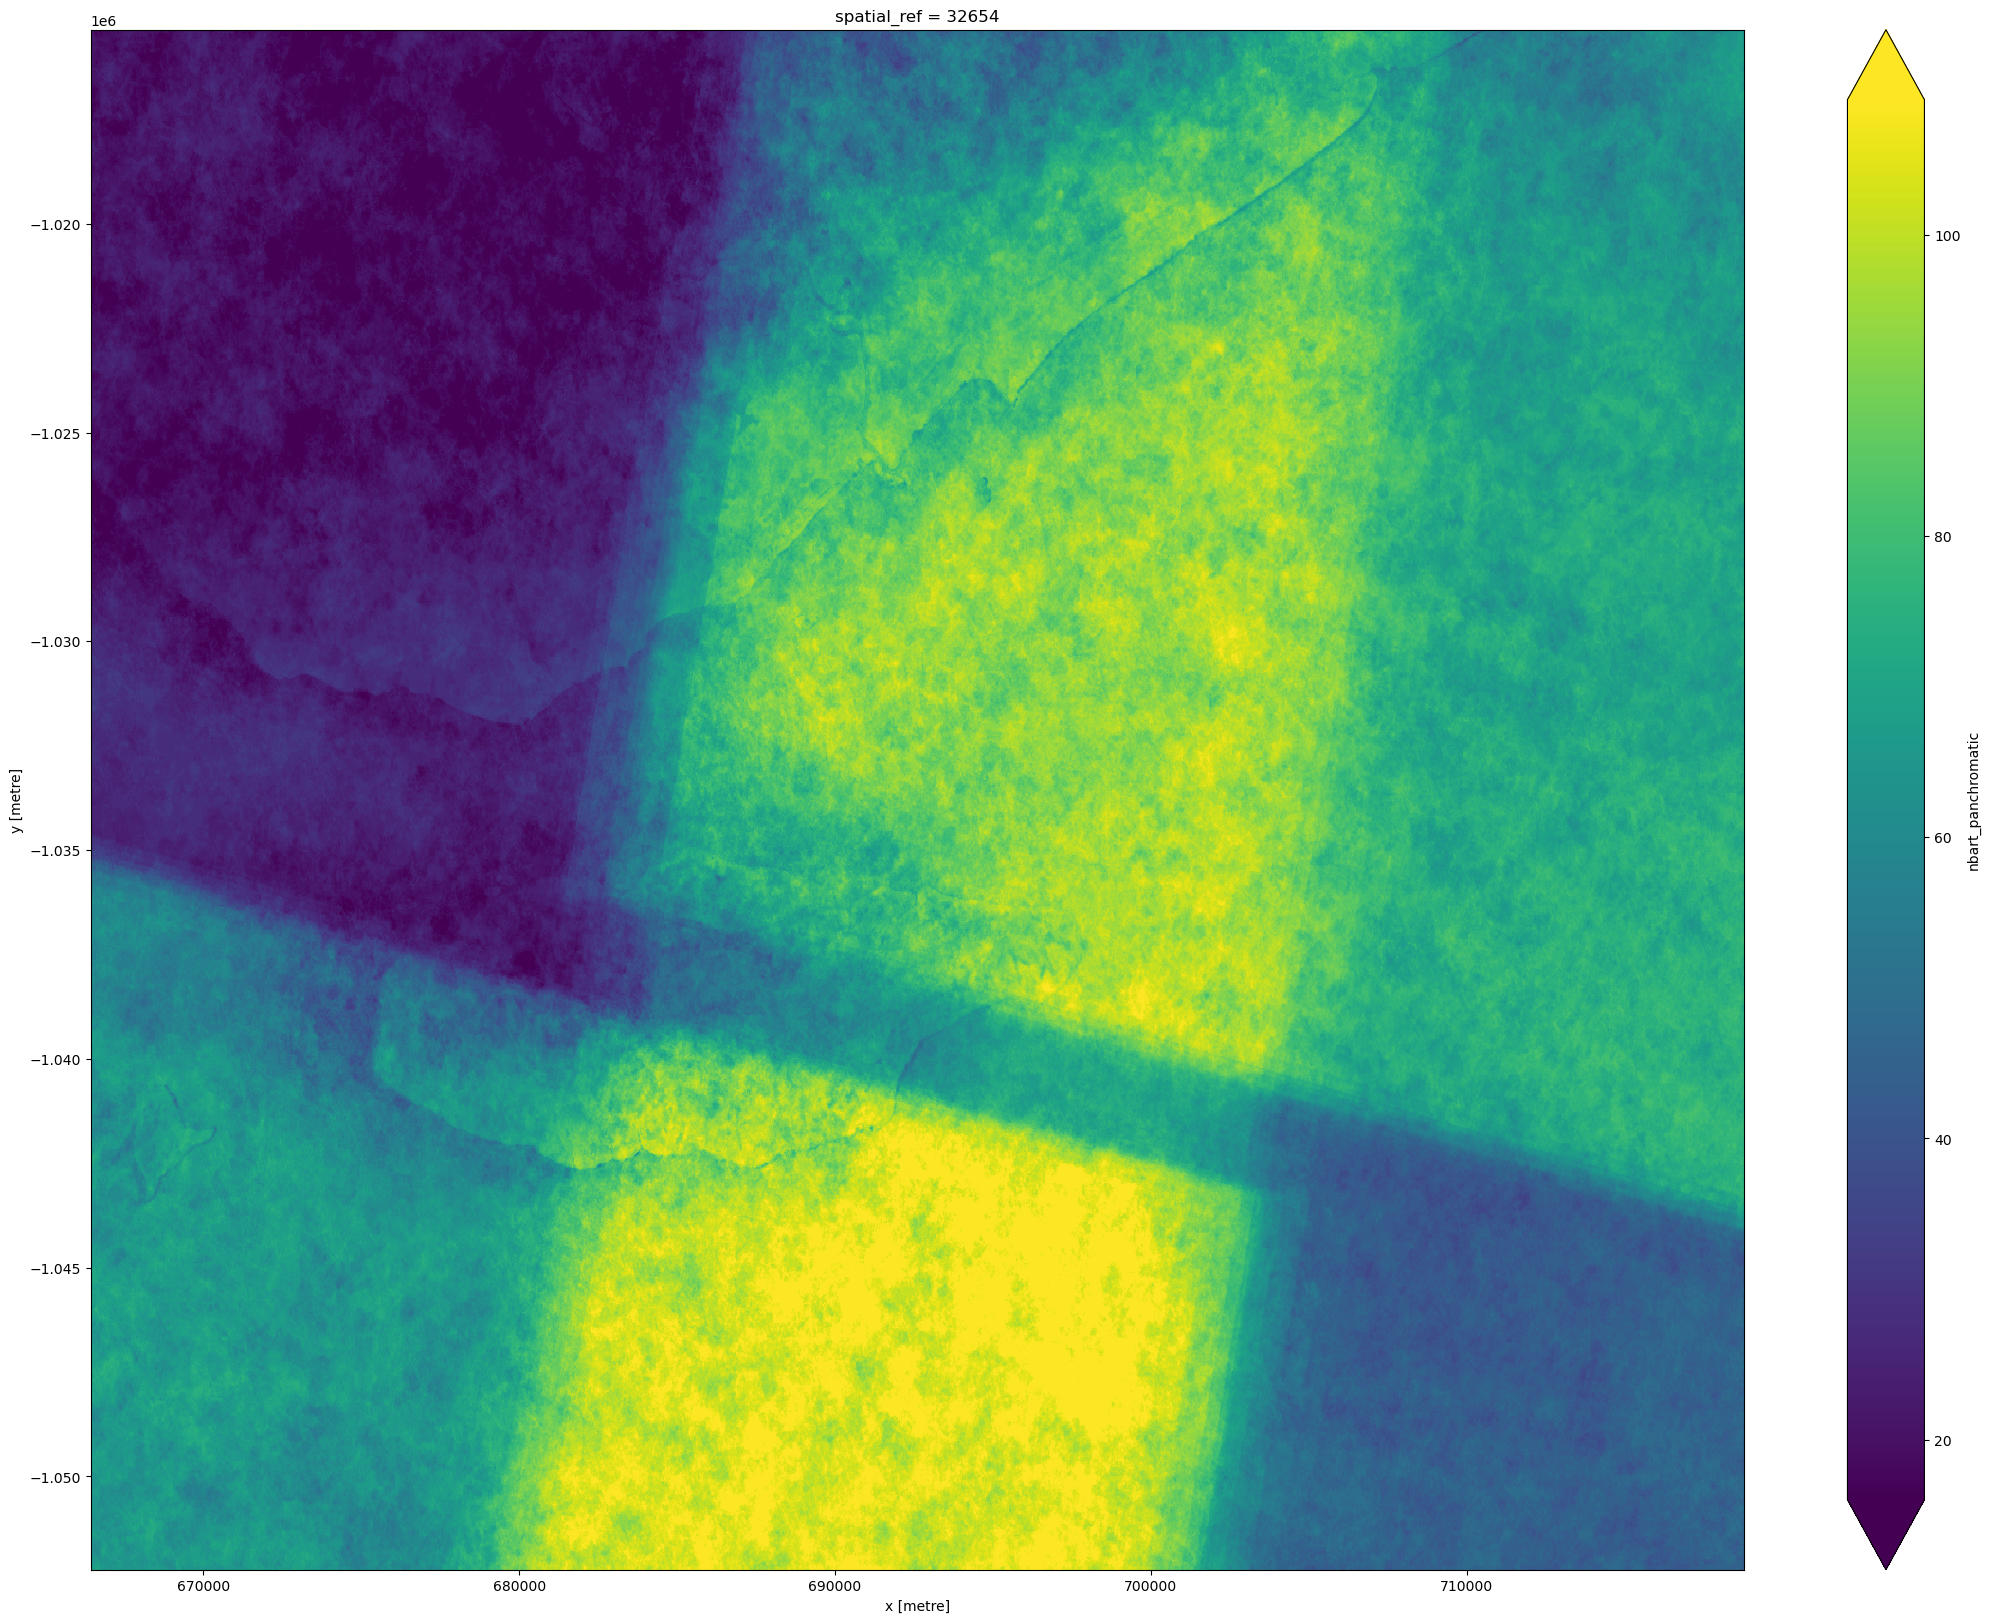

In [3]:
ds.notnull().sum(dim="time").nbart_panchromatic.plot.imshow(size=20, robust=True)

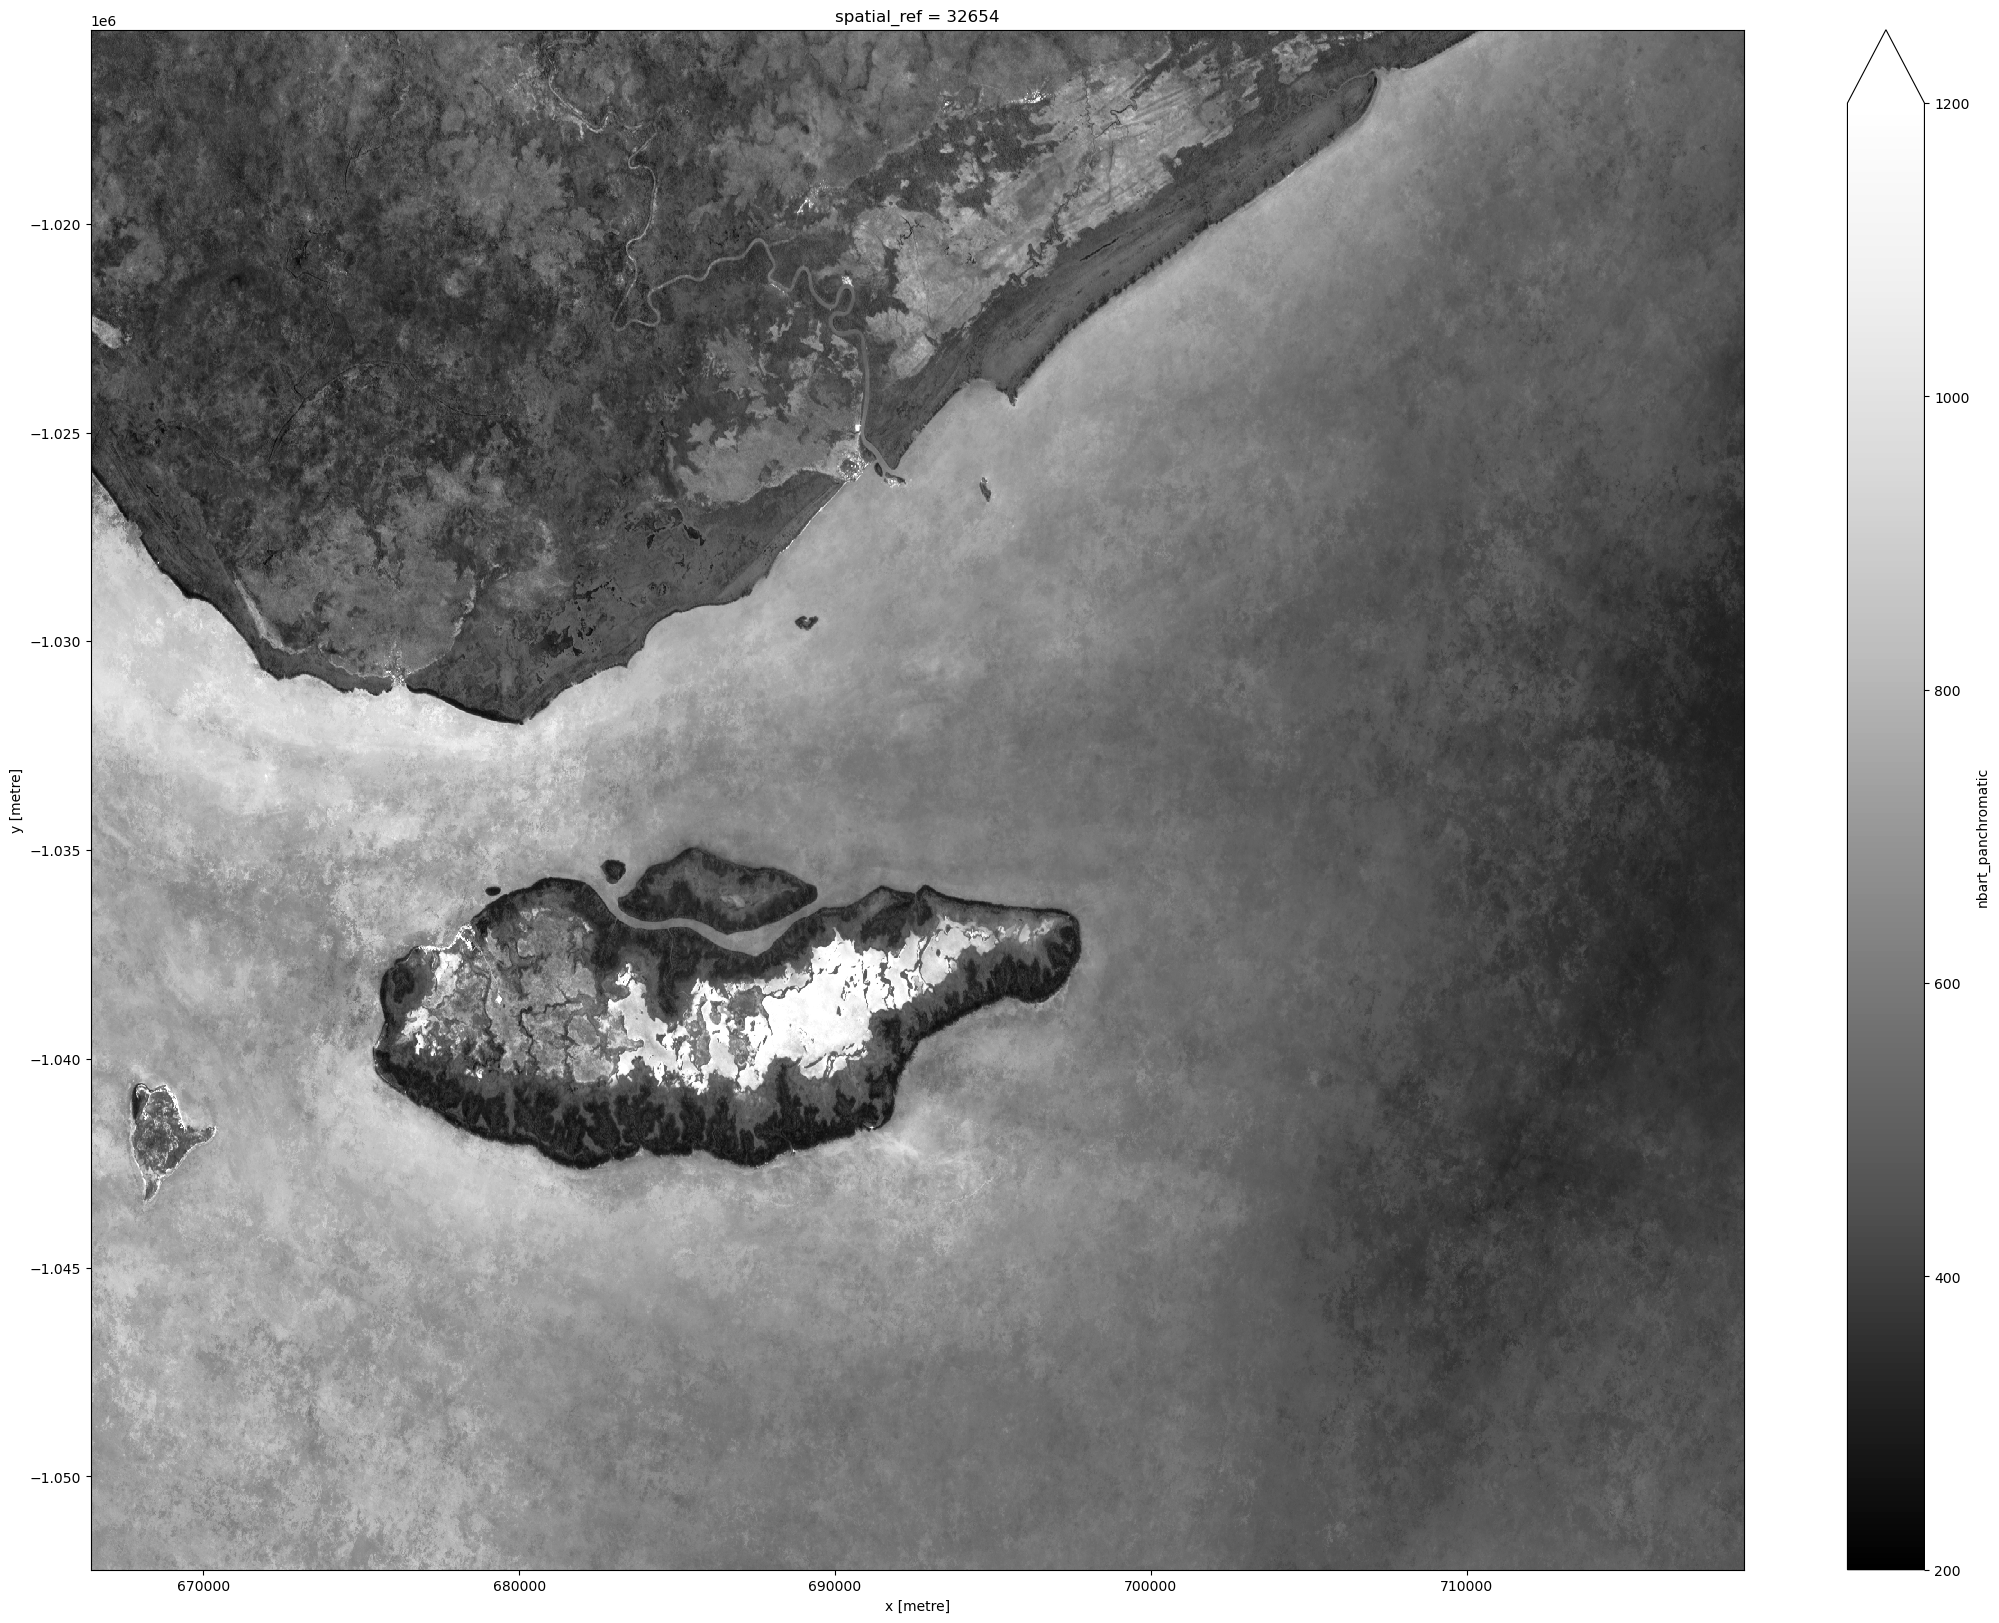

In [6]:
import odc.geo.xr
median_pan = ds.median(dim="time").nbart_panchromatic
median_pan.odc.write_cog("pan_median_png.tif", overwrite=True)
median_pan.plot.imshow(size=20, vmin=200, vmax=1200, cmap="Greys_r")